In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rcParams

rcParams['text.usetex'] = True
rcParams['font.size'] = 14

# FILE_PATH = "data/cleaned_data.txt"
FILE_PATH = "data/cleaned_and_no_troll_data.txt"

TO_METERS = {
    "m": 1,
    "cm": 0.01,
    "mm": 0.001,
    "ft": 0.3048,
    "in": 0.0254
}

def load():
    with open(FILE_PATH, "r") as file:
        return file.read()

data = load()

# parse and convert units to meters

def parse(data, digits=6):
    data = data.split("\n")
    data = [float(n) * TO_METERS[u] for n, u in [d.split() for d in data]]
    data = [round(n, digits) for n in data]
    return data

data = parse(data)
data = sorted(data)

In [7]:
# remove outliers via Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

def remove_outliers(dataset):
    q1 = stats.scoreatpercentile(dataset, 25)
    q3 = stats.scoreatpercentile(dataset, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return [n for n in dataset if lower_bound <= n <= upper_bound]

no_outliers_data = remove_outliers(data)

def print_description(dataset):
    print(dataset)
    print(stats.describe(dataset))
    print("q1:", stats.scoreatpercentile(dataset, 25))
    print("q2 (median):", stats.scoreatpercentile(dataset, 50))
    print("q3:", stats.scoreatpercentile(dataset, 75))
    print("iqr:", stats.iqr(dataset))
    print("std:" , stats.tstd(dataset))
    print("median absolute deviation:", stats.median_abs_deviation(dataset))

print("original (with outliers):")
print_description(data)
print("------")
print("no outliers:")
print_description(no_outliers_data)


original (with outliers):
[6.7056, 7.3152, 7.62, 8.5344, 9.0, 9.144, 9.144, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.3632, 10.3632, 10.668, 10.668, 10.668, 10.668, 10.668, 11.5824, 12.0, 12.0, 12.0, 12.0, 12.0, 12.192, 12.192, 12.192, 12.192, 12.3, 12.4, 12.4, 12.4, 12.4, 12.4, 12.5, 12.8016, 13.1064, 13.716, 13.716, 13.716, 13.716, 13.716, 14.3256, 14.3256, 14.6304, 14.6304, 14.7828, 14.9352, 15.0, 15.24, 15.24, 15.24, 15.24, 15.24, 15.24, 15.24, 15.24, 16.4592, 16.764, 16.764, 17.0, 17.0688, 17.6784, 18.0, 18.0, 18.0, 18.288, 18.288, 19.812, 20.0, 20.0, 20.1168, 21.336, 21.336, 22.86, 24.384, 24.384, 25.0, 27.432, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.48, 30.48, 30.48, 36.576, 46.6344, 60.96, 80.0, 100.0]
DescribeResult(nobs=95, minmax=(np.float64(6.7056), np.float64(100.0)), mean=np.float64(18.44525894736842), variance=np.float64(185.9979003437223), skewness=np.float64(3.6953843168532474), kurtosis=np.float64(16.564600120263563))
q1: 12.0
q2 (median): 14.6304
q3: 19.906
iqr: 7.905999

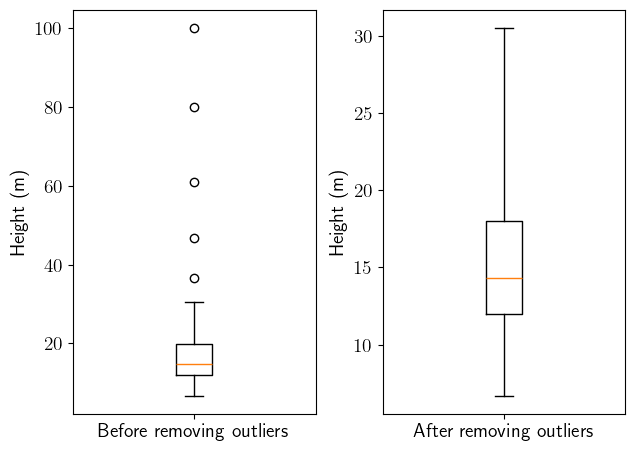

In [8]:
# # box plot

fig, axs = plt.subplots(ncols=2)
fig.tight_layout()
axs[0].set_ylabel("Height (m)")
axs[1].set_ylabel("Height (m)")
axs[0].boxplot(data, tick_labels=["Before removing outliers"])
axs[1].boxplot(no_outliers_data, whis=10, tick_labels=["After removing outliers"])
# axs[0].yaxis.grid(True)
# axs[1].yaxis.grid(True)
plt.savefig("figs/boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

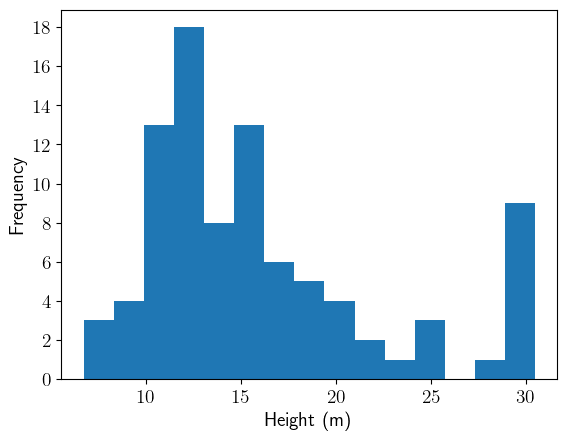

In [9]:
# histogram

fig, ax = plt.subplots()
ax.hist(no_outliers_data, bins=15)
ax.set_xlabel("Height (m)")
ax.set_ylabel("Frequency")
ax.set_yticks(range(0, 20, 2))

plt.savefig("figs/histogram.png", dpi=300, bbox_inches='tight')
plt.show()

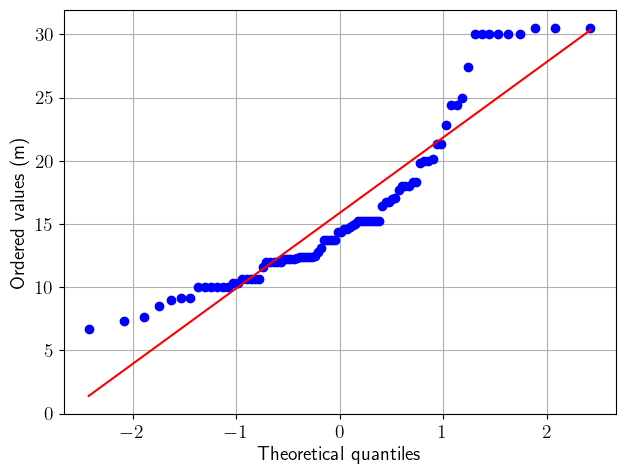

In [10]:
# probability plot vs normal distribution

fig, ax = plt.subplots()
fig.tight_layout()
stats.probplot(no_outliers_data, dist="norm", plot=ax)

# adjust plot properties
ax.set_title("")
ax.set_ylabel("Ordered values (m)")
ax.grid(True)
ax.set_yticks(range(0, 35, 5))


plt.savefig("figs/samplenorm.png", dpi=300, bbox_inches="tight")
plt.show()